In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('Cleaned_Online_Retail.xlsx')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,1,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,1,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,1,201012,2010,12,3,8,2.75,17850,United Kingdom,22.00,2010Q4


## Summary of data

In [ ]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )

Number of transactions:  17758
Number of products bought:  3657
Number of customers: 4298


## RFM analysis

RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase **behavior** to divide customers into groups. <br> RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
- RECENCY (R): Days since last purchase 
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

## Recency

To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

In [ ]:
#last date available in our dataset
df['InvoiceDate'].max()

Timestamp('2011-11-30 17:37:00')

The last date we have is 2011-11-30 so we will use it as reference.

In [ ]:
import datetime as dt
now = dt.date(2011,11,30)
print(now)

2011-11-30


In [ ]:
df.drop('Date',1,inplace=True)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4


In [ ]:
#create a new column called date which contains the date of invoice only
df['Date'] = df['InvoiceDate'].dt.date

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,1,201012,2010,12,3,8,2.75,17850,United Kingdom,22.00,2010Q4,2010-12-01


In [ ]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-10-31
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [ ]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [ ]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,316
1,12347,2011-10-31,30
2,12348,2011-09-25,66
3,12349,2011-11-21,9
4,12350,2011-02-02,301


In [ ]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

Now we have the recency attribute created. e.g: Customer with ID = 12346 did his/her last purshace 316 days ago.

In [ ]:
frequency_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,171
2,12348,31
3,12349,73
4,12350,17


## Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?**

To do that, first, we will create a new column total cost to have the total price per invoice.

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Day_of_Month', 'Year_Month', 'Year', 'Month', 'Day', 'Hour',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Sales_Amount', 'Quarter',
       'Date'],
      dtype='object')

In [ ]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'Total_Sales_Amount': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4085.18
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


### Create RFM table
 

In [ ]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346,316,1
1,12347,30,171
2,12348,66,31
3,12349,9,73
4,12350,301,17


In [ ]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,316,1,77183.60
12347,30,171,4085.18
12348,66,31,1797.24
12349,9,73,1757.55
12350,301,17,334.40


Customer with ID = 12346 has recency: 316 days, frequency:1, and monetary: 77183,60 £.

In [ ]:
rfm_df['Recency'].describe()

count    4298.000000
mean       90.461610
std        98.574978
min         0.000000
25%        15.000000
50%        49.000000
75%       144.500000
max       364.000000
Name: Recency, dtype: float64

We see that even though the average is 90 day recency, median is 49 days recency.

#### RFM Table Correctness verification

In [ ]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,18,201101,2011,1,2,10,1.04,12346,United Kingdom,77183.6,2011Q1,2011-01-18


In [ ]:
(now - dt.date(2011,1,18)).days == 316

True

As we can see our RFM table is correct. The first customer bought only once, and only one product with huge amount. 

## Customer segments with RFM Model

Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says **80% of the results come from 20% of the causes**.

Similarly, **20% customers contribute to 80% of your total revenue**. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [ ]:
### Applying 80-20 rule

pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  6696014.76


In [ ]:
customers_rank = rfm_df.copy()
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346,316,1,77183.60,9.0
12347,30,171,4085.18,337.0
12348,66,31,1797.24,948.0
12349,9,73,1757.55,971.0
12350,301,17,334.40,3046.0


In [ ]:
customers_rank[['Recency','Frequency','Monetary']]

,Recency,Frequency,Monetary
CustomerID,,,
12346,316,1,77183.60
12347,30,171,4085.18
12348,66,31,1797.24
12349,9,73,1757.55
12350,301,17,334.40
...,...,...,...
18280,268,10,180.60
18281,171,7,80.82
18282,117,7,100.21


### Top Customers

In [ ]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
14646,7,1994,268478.00,1.0
18102,2,408,248171.76,2.0
17450,1,331,192828.39,3.0
14911,0,5353,136732.25,4.0
12415,15,716,124914.53,5.0
...,...,...,...,...
16454,35,2,6.90,4294.0
14792,54,2,6.20,4295.0
16738,288,1,3.75,4296.0


In [ ]:
#get top 20% of the customers
top_20_cutoff = 4298 *20 /100
top_20_cutoff

859.6

In [ ]:
#sum the monetary values over the customer with rank <=860
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 860]['Monetary'].sum()
revenueByTop20

6203019.131

In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

## Customer segmentation

- To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.  

- RFM model can be used in conjunction with certain predictive models like **KMeans clustering**, **Logistic Regression** etc to produce better informative results on customer behavior.

- We will go for KMeans since it has been widely used for Customer Segmentation and it offers the advantage of being simple to implement.

### Applying K-means clustering on RFM variables

In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,316,1,77183.60
12347,30,171,4085.18
12348,66,31,1797.24
12349,9,73,1757.55
12350,301,17,334.40


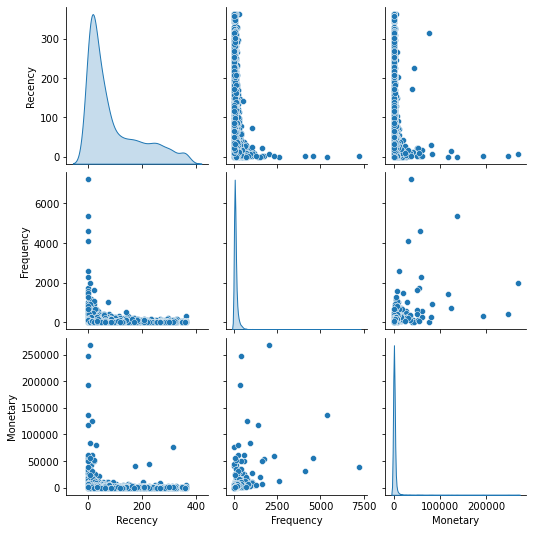

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(rfm_df,diag_kind='kde')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


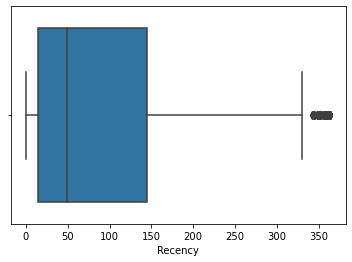

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


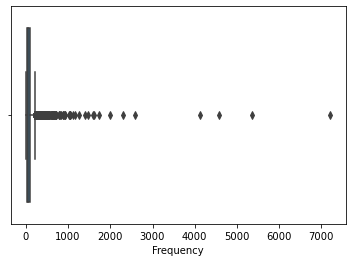

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


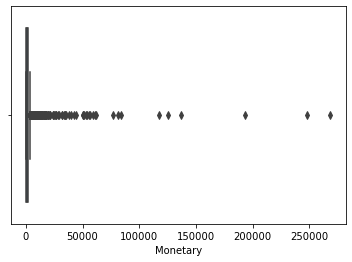

In [ ]:
for i in rfm_df.columns:
    sns.boxplot(rfm_df[i])
    plt.show()

## Observations
We can notice that we have a **skewed distribution** of the 3 variables and there exist **outliers**.

This indicates how normalization is required to make the data features normally distributed as **clustering** algorithms **require** them to be **normally distributed**.

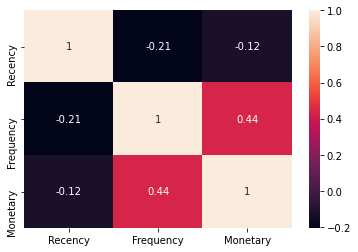

In [ ]:
sns.heatmap(rfm_df.corr(),annot=True)
plt.show()

In [ ]:
rfm_data=rfm_df.copy()

In [ ]:
rfm_data.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_data_transformed = pd.DataFrame(pt.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']]))
features=['Recency', 'Frequency', 'Monetary']
rfm_data_transformed.columns = features
rfm_data_transformed.head()

,Recency,Frequency,Monetary
0,1.603704,-2.433416,3.257660
1,-0.348071,1.167772,1.369843
2,0.215211,-0.195306,0.769547
3,-1.051570,0.483645,0.752738
4,1.554599,-0.660685,-0.571179


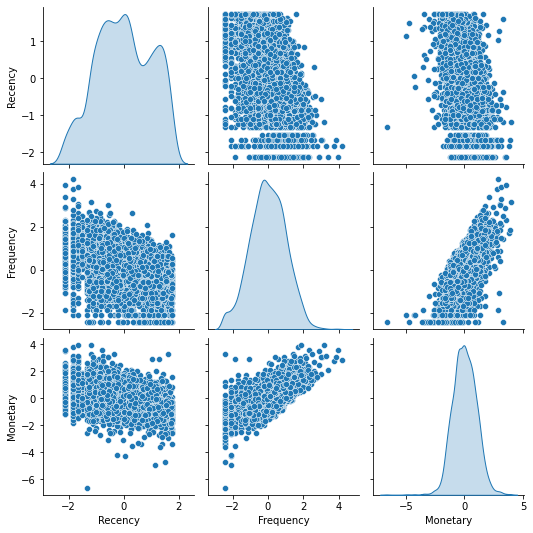

In [ ]:
sns.pairplot(rfm_data_transformed,diag_kind='kde')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


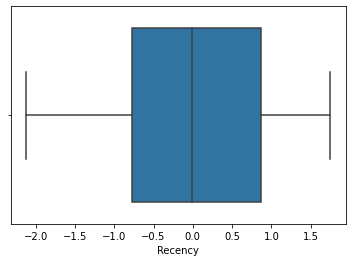

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


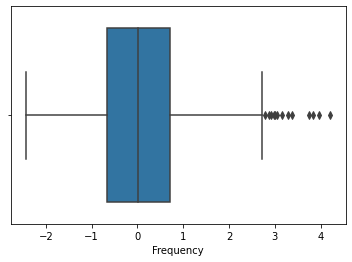

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


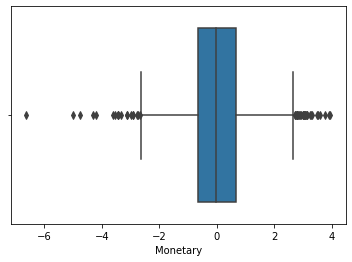

In [ ]:
for i in rfm_data_transformed.columns:
    sns.boxplot(rfm_data_transformed[i])
    plt.show()

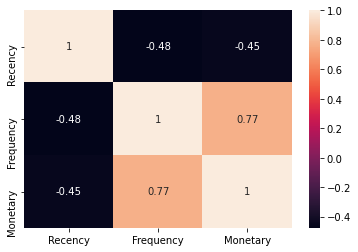

In [ ]:
sns.heatmap(rfm_data_transformed.corr(),annot=True)
plt.show()

On one hand, we have a negative correlation between:
- Recency and Frequency
- Recency and Monetary

On the other hand, the correlation between **Monetary and Frequency** is positive comparing to negative ones but still not that strong (<0.8).

## K-means implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [ ]:
x=rfm_data_transformed.copy()

In [ ]:
x.head()

,Recency,Frequency,Monetary
0,1.603704,-2.433416,3.257660
1,-0.348071,1.167772,1.369843
2,0.215211,-0.195306,0.769547
3,-1.051570,0.483645,0.752738
4,1.554599,-0.660685,-0.571179


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
y_pred = kmeans.fit_predict(x)

In [ ]:
y_pred

array([2, 1, 6, ..., 4, 3, 1])

In [ ]:
kmeans

KMeans(random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.52217748, -0.92035532, -0.92960347],
       [-0.26754888,  0.91871419,  0.88304397],
       [ 0.90192841,  0.31266877,  0.32676706],
       [-1.240251  ,  1.60808064,  1.6409112 ],
       [ 1.10836754, -1.63684694, -1.57183761],
       [ 1.2145928 , -0.61898756, -0.63616384],
       [-0.06036915, -0.15209947, -0.05664722],
       [-1.25046618,  0.40237283,  0.27119692]])

In [ ]:
kmeans.transform(x)

array([[4.93375162, 4.51410765, 4.07720565, ..., 4.31340064, 4.35409926,
        5.01068373],
       [3.11095509, 0.55270843, 1.83894184, ..., 3.1078112 , 1.96461362,
        1.61467501],
       [1.98910796, 1.21941731, 0.96211882, ..., 1.77603291, 0.87201359,
        1.65945216],
       ...,
       [1.44469638, 3.49237397, 2.5544124 , ..., 1.32572018, 2.09079153,
        3.20671979],
       [3.96539887, 2.30184621, 3.63635811, ..., 4.64226141, 3.29606113,
        2.13012742],
       [2.20869891, 0.47882926, 1.27955661, ..., 2.32654198, 1.05975107,
        1.09575789]])

In this example, the first instance in x is located at a distance of 4.31295675
from the first centroid, 5.19958211 from the second centroid, If
you have a high-dimensional dataset and you transform it this way, you
end up with a k-dimensional dataset: this transformation can be a very
efficient nonlinear dimensionality reduction technique.

In [ ]:
## Elbow method

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(1, 30)]

inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
pd.DataFrame({'Value of k':range(1,30),'WCSS Score':inertias}) 

,Value of k,WCSS Score
0,1,12894.000000
1,2,6798.141723
2,3,5285.708321
3,4,4258.042682
4,5,3689.640208
5,6,3222.032497
6,7,2942.059120
7,8,2722.010917
8,9,2552.934644
9,10,2388.561888


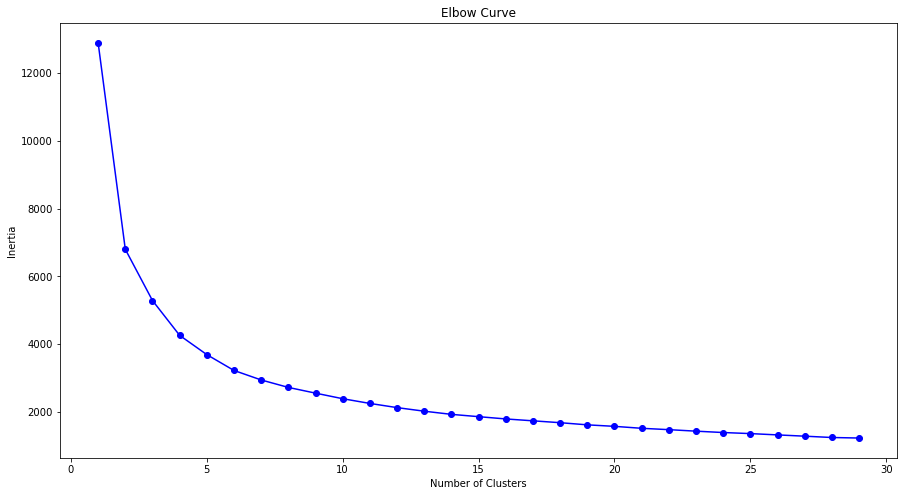

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30),inertias,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
scores = [silhouette_score(x,model.labels_) for model in kmeans_per_k[1:]]

In [ ]:
pd.DataFrame({'Value of k':range(2,30),'Silhouette Score':scores}) 

,Value of k,Silhouette Score
0,2,0.391580
1,3,0.299079
2,4,0.311762
3,5,0.287182
4,6,0.278648
5,7,0.265691
6,8,0.260922
7,9,0.267049
8,10,0.265985
9,11,0.263369


* The silhouette coefficient can vary between -1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
  while a coefficient close to 0 means that it is close to a cluster boundary.
* Coefficient close to -1 means that instance may have been assigned to the wrong cluster.

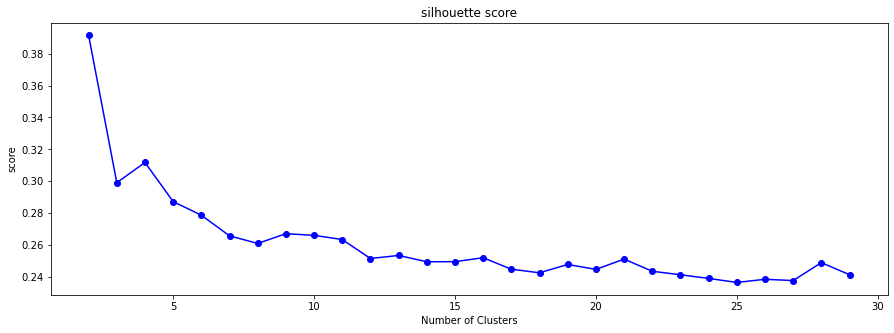

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(2,30),scores,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('score')
plt.title('silhouette score')
plt.show()

- From the Elbow curve and Silhouette scores for different K- Values, We can observe that K can take optimum values from 4 to 6. 
- For our business Scenerio we are going with the k value of 6 as the optimum value.

## Observations
* The above plot confirms that k = 6 is a  good choice.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfm_kmeans=rfm_data_transformed.copy()

In [ ]:
km=KMeans(n_clusters=6,random_state=42)
mod_1=km.fit(rfm_kmeans)

rfm_kmeans['Labels']=mod_1.labels_
silhouette_score(rfm_kmeans,mod_1.labels_,random_state=48)

0.5379438885689618

In [ ]:
rfm_kmeans.head()

,Recency,Frequency,Monetary,Labels
0,1.603704,-2.433416,3.257660,1
1,-0.348071,1.167772,1.369843,4
2,0.215211,-0.195306,0.769547,1
3,-1.051570,0.483645,0.752738,0
4,1.554599,-0.660685,-0.571179,5


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


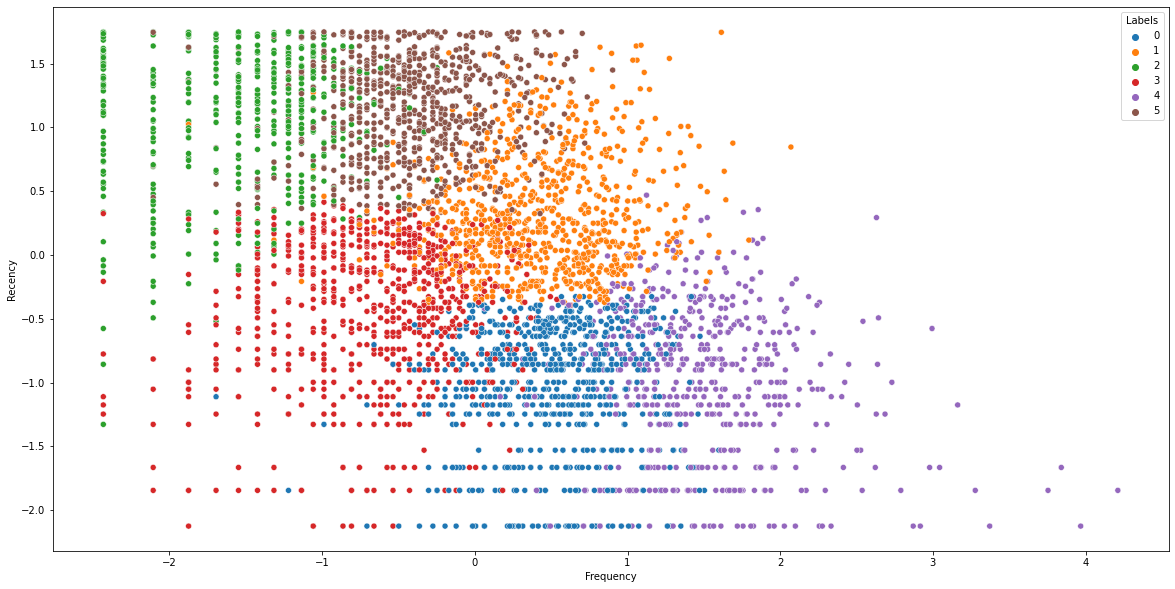

In [ ]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.scatterplot(rfm_kmeans['Frequency'],rfm_kmeans['Recency'],hue=rfm_kmeans['Labels'],palette='tab10')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


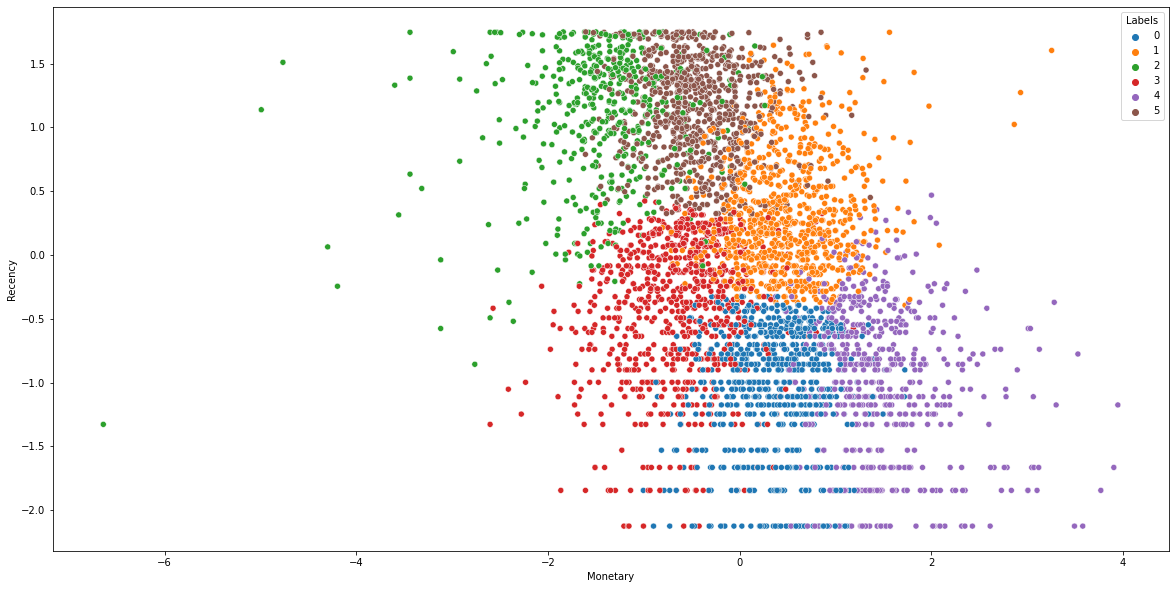

In [ ]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.scatterplot(rfm_kmeans['Monetary'],rfm_kmeans['Recency'],hue=rfm_kmeans['Labels'],palette='tab10')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


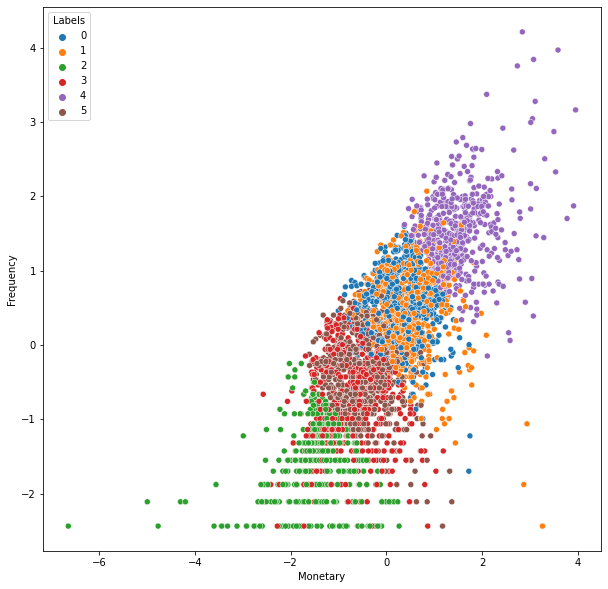

In [ ]:
plt.figure(figsize=(10,10))
sns.color_palette("tab10")
sns.scatterplot(rfm_kmeans['Monetary'],rfm_kmeans['Frequency'],hue=rfm_kmeans['Labels'],palette='tab10')
plt.show()

- We can observe strong correlation between Frequency and Monetary
- Hence, we can try PCA to reduce Multi-collinearity effect.

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca_data = rfm_data_transformed.copy()

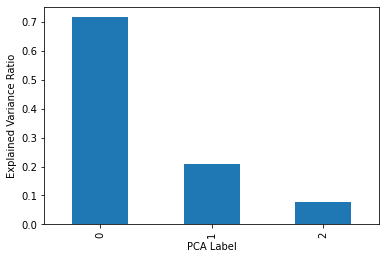

In [ ]:
pca_mod = PCA(pca_data.shape[1],random_state=0)
pcadata = pca_mod.fit_transform(pca_data)
exp_var = pca_mod.explained_variance_ratio_.round(4)
pd.DataFrame(exp_var).plot(kind='bar',legend=None)
plt.xlabel('PCA Label')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
pca_kmeans=KMeans(n_clusters=6,random_state=0)
pca_mod_1=pca_kmeans.fit(pcadata)
silhouette_score(pcadata,pca_mod_1.labels_)

0.2784761230786483

In [ ]:
pcadata=pd.DataFrame(pcadata,columns=['PC1','PC2','PC3'])

pcadata.head(5)

,PC1,PC2,PC3
0,-0.309292,-1.846721,3.949644
1,1.729960,-0.593668,0.126930
2,0.242446,-0.416260,0.666791
3,1.279800,0.470820,0.216261
4,-1.527807,-0.919250,0.017722


In [ ]:
pcadata['Labels']= pca_mod_1.labels_
pcadata.head()

,PC1,PC2,PC3,Labels
0,-0.309292,-1.846721,3.949644,0
1,1.729960,-0.593668,0.126930,4
2,0.242446,-0.416260,0.666791,0
3,1.279800,0.470820,0.216261,5
4,-1.527807,-0.919250,0.017722,2


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


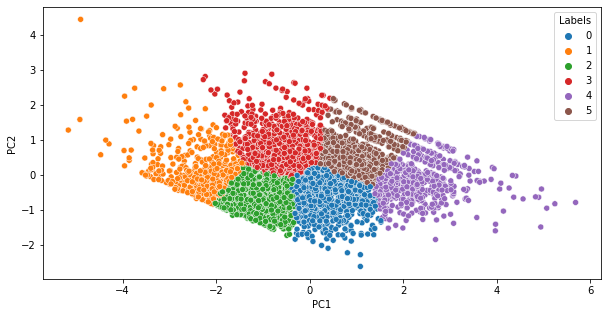

In [ ]:
plt.figure(figsize=(10,5))
sns.color_palette("tab10")
sns.scatterplot(pcadata['PC1'],pcadata['PC2'],hue=pcadata['Labels'],palette='tab10')
plt.show()

## Classification Models

In [ ]:
inp=rfm_segment.drop(['Labels'],1)
out=rfm_segment['Labels']

In [ ]:
rfm_segment.Labels.value_counts()

0    860
3    815
2    795
5    737
4    599
1    492
Name: Labels, dtype: int64

### Splitting the data 


### Without PCA

#### Random Forest

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=42) 

In [ ]:
rf=RandomForestClassifier(random_state=0)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [ ]:
print("Accuarcy of Random Forest model = ",accuracy_score(ytest,ypred))

Accuarcy of Random Forest model =  0.9643410852713178


In [ ]:
print('Classification Report for Random Forest: \n\n')

print(classification_report(ytest,ypred))

Classification Report for Random Forest: 


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.97      0.96      0.96       152
           2       0.94      0.96      0.95       238
           3       0.95      0.97      0.96       231
           4       0.99      0.97      0.98       181
           5       0.99      0.96      0.97       222

    accuracy                           0.96      1290
   macro avg       0.97      0.96      0.96      1290
weighted avg       0.96      0.96      0.96      1290



#### Support Vector Machine Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
import sklearn.svm as svm

svc=SVC(random_state=0,kernel='linear')

# svc=svm.LinearSVC(random_state=0)

svc.fit(xtrain,ytrain)


ypred=svc.predict(xtest)

print("Accuracy of SVC model = ",accuracy_score(ytest,ypred))

Accuracy of SVC model =  0.9302325581395349


In [ ]:
print('Classification Report for SVC: \n\n')
print(classification_report(ytest,ypred))

Classification Report for SVC: 


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       266
           1       0.91      0.94      0.92       152
           2       0.92      0.89      0.91       238
           3       0.93      0.94      0.94       231
           4       0.94      0.98      0.96       181
           5       0.97      0.92      0.94       222

    accuracy                           0.93      1290
   macro avg       0.93      0.93      0.93      1290
weighted avg       0.93      0.93      0.93      1290



### With PCA

In [ ]:
inp=pcadata.drop('Labels',1)
out=pcadata['Labels']

xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=42) 

#### Random Forest

In [ ]:
rf=RandomForestClassifier(random_state=0)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print("Accuracy of Random Forest model = ",accuracy_score(ytest,ypred))

Accuracy of Random Forest model =  0.9751937984496124


In [ ]:
print('Classification Report for Random Forest: \n\n')
print(classification_report(ytest,ypred))

Classification Report for Random Forest: 


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.97      0.97      0.97       152
           2       0.97      0.97      0.97       238
           3       0.96      0.96      0.96       231
           4       0.99      0.99      0.99       181
           5       0.99      0.98      0.98       222

    accuracy                           0.98      1290
   macro avg       0.98      0.98      0.98      1290
weighted avg       0.98      0.98      0.98      1290



#### SVC

In [ ]:

svc=svm.LinearSVC(random_state=0)

svc.fit(xtrain,ytrain)


ypred=svc.predict(xtest)

print("Accuracy of SVC model = ",accuracy_score(ytest,ypred))

Accuracy of SVC model =  0.8635658914728682


In [ ]:
print('Classification Report for SVC: \n\n')
print(classification_report(ytest,ypred))

Classification Report for SVC: 


              precision    recall  f1-score   support

           0       0.87      0.73      0.79       266
           1       0.99      0.92      0.95       152
           2       0.81      0.92      0.86       238
           3       0.75      0.97      0.85       231
           4       0.96      0.98      0.97       181
           5       0.93      0.72      0.81       222

    accuracy                           0.86      1290
   macro avg       0.88      0.87      0.87      1290
weighted avg       0.87      0.86      0.86      1290



In [ ]:
### Inverse Transform of RFM variables

rfm_kmeans_inv_transform = rfm_kmeans.copy()
rfm_kmeans_inv_transform.drop('Labels',1,inplace=True)
rfm_kmeans_inv_transform.set_index(rfm_df.index,inplace=True)
rfm_kmeans_inv_transform.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,1.603704,-2.433416,3.257660
12347,-0.348071,1.167772,1.369843
12348,0.215211,-0.195306,0.769547
12349,-1.051570,0.483645,0.752738
12350,1.554599,-0.660685,-0.571179


In [ ]:
rfm_kmeans_inv_transform=pd.DataFrame(pt.inverse_transform(rfm_kmeans_inv_transform),columns=rfm_kmeans_inv_transform.columns,
                                      index=rfm_kmeans_inv_transform.index)
rfm_kmeans_inv_transform.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,316.0,1.0,77183.60
12347,30.0,171.0,4085.18
12348,66.0,31.0,1797.24
12349,9.0,73.0,1757.55
12350,301.0,17.0,334.40


In [ ]:
rfm_kmeans_inv_transform['Labels']=pca_mod_1.labels_
rfm_kmeans_inv_transform.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,316.0,1.0,77183.60,0
12347,30.0,171.0,4085.18,4
12348,66.0,31.0,1797.24,0
12349,9.0,73.0,1757.55,5
12350,301.0,17.0,334.40,2


In [ ]:
rfm_kmeans_inv_transform.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
0,85.848837,80.529070,1693.735548
1,204.439024,6.595528,158.790610
2,213.644025,27.354717,462.000516
3,32.719018,20.878528,372.350960
4,15.196995,337.295492,8720.933072
5,11.905020,84.671642,1276.371168


In [ ]:
rfm_kmeans_inv_transform.Labels.value_counts()

0    860
3    815
2    795
5    737
4    599
1    492
Name: Labels, dtype: int64

In [ ]:
rfm_kmeans_inv_transform.Labels.value_counts().sum()

4298

In [ ]:
rfm_mean=rfm_kmeans_inv_transform.copy()
rfm_mean

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,316.0,1.0,77183.60,0
12347,30.0,171.0,4085.18,4
12348,66.0,31.0,1797.24,0
12349,9.0,73.0,1757.55,5
12350,301.0,17.0,334.40,2
...,...,...,...,...
18280,268.0,10.0,180.60,1
18281,171.0,7.0,80.82,1
18282,117.0,7.0,100.21,1


In [ ]:
rfm_mean.drop('Labels',1,inplace=True)

In [ ]:
rfm_mean.describe()

,Recency,Frequency,Monetary
count,4298.000000,4298.000000,4298.000000
mean,90.461610,87.414146,1947.421697
std,98.574978,213.657357,8350.776997
min,0.000000,1.000000,0.000000
25%,15.000000,17.000000,303.010000
50%,49.000000,40.000000,650.590000
75%,144.500000,96.000000,1593.702500
max,364.000000,7212.000000,268478.000000


In [ ]:
rMean=90.461610
fMean=87.414146
mMean=1947.421697

In [ ]:
rfm_segment=rfm_kmeans_inv_transform.copy()

rfm_segment.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,316.0,1.0,77183.60,0
12347,30.0,171.0,4085.18,4
12348,66.0,31.0,1797.24,0
12349,9.0,73.0,1757.55,5
12350,301.0,17.0,334.40,2


In [ ]:
rfm_segment.head()

rfm_segment['Labels'].value_counts()

cluster_0 = rfm_segment[rfm_segment['Labels']==0]
cluster_1 = rfm_segment[rfm_segment['Labels']==1]
cluster_2 = rfm_segment[rfm_segment['Labels']==2]
cluster_3 = rfm_segment[rfm_segment['Labels']==3]
cluster_4 = rfm_segment[rfm_segment['Labels']==4]
cluster_5 = rfm_segment[rfm_segment['Labels']==5]

### Segmentation using Mean and Median values

In [ ]:
cluster_0.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
0,85.848837,80.52907,1693.735548


In [ ]:
cluster_1.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
1,204.439024,6.595528,158.79061


In [ ]:
cluster_2.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
2,213.644025,27.354717,462.000516


In [ ]:
cluster_3.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
3,32.719018,20.878528,372.35096


In [ ]:
cluster_4.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
4,15.196995,337.295492,8720.933072


In [ ]:
cluster_5.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
5,11.90502,84.671642,1276.371168


In [ ]:
rfm_kmeans_inv_transform.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
0,67.0,67.0,1182.465
1,208.0,6.0,134.625
2,209.0,23.0,379.350
3,29.0,19.0,320.460
4,12.0,241.0,4097.370
5,12.0,77.0,1105.780


In [ ]:
median = rfm_kmeans_inv_transform.copy()
median

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,316.0,1.0,77183.60,0
12347,30.0,171.0,4085.18,4
12348,66.0,31.0,1797.24,0
12349,9.0,73.0,1757.55,5
12350,301.0,17.0,334.40,2
...,...,...,...,...
18280,268.0,10.0,180.60,1
18281,171.0,7.0,80.82,1
18282,117.0,7.0,100.21,1


In [ ]:
cluster_0.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
0,67.0,67.0,1182.465


In [ ]:
cluster_1.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
1,208.0,6.0,134.625


In [ ]:
cluster_2.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
2,209.0,23.0,379.35


In [ ]:
cluster_3.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
3,29.0,19.0,320.46


In [ ]:
cluster_4.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
4,12.0,241.0,4097.37


In [ ]:
cluster_5.groupby('Labels').median()

,Recency,Frequency,Monetary
Labels,,,
5,12.0,77.0,1105.78


### Segmentation using Total Sales Amount per month for each cluster

In [ ]:
rfm_segment.groupby('Labels').count().iloc[:,0]

Labels
0    860
1    492
2    795
3    815
4    599
5    737
Name: Recency, dtype: int64

### Cluster 0:

In [ ]:
cluster_0.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12346,316.0,1.0,77183.60,0
12348,66.0,31.0,1797.24,0
12354,223.0,58.0,1079.40,0
12360,43.0,129.0,2662.06,0
12364,31.0,58.0,1002.78,0


In [ ]:
cluster_0.reset_index(inplace=True)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,2.55,17850,United Kingdom,15.30,2010Q4,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1,201012,2010,12,3,8,3.39,17850,United Kingdom,20.34,2010Q4,2010-12-01


In [ ]:
df_cluster_zero = df.merge(cluster_0, on='CustomerID')
df_cluster_zero.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,1,201012,2010,12,3,...,2.55,17850,United Kingdom,15.30,2010Q4,2010-12-01,363.0,297.0,5391.21,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,1,201012,2010,12,3,...,3.39,17850,United Kingdom,20.34,2010Q4,2010-12-01,363.0,297.0,5391.21,0


In [ ]:
df_cluster_zero.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    752
Germany            21
Others             20
France             14
Switzerland        12
Name: CustomerID, dtype: int64

- Out of 860 in cluster zero, we have 752 customers from UK.

In [ ]:
df_cluster_zero_revenue= df_cluster_zero.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_zero_revenue

,Year_Month,Total_Sales_Amount
0,201012,86925.510
1,201101,175393.900
2,201102,80864.020
3,201103,110086.990
4,201104,118285.741
5,201105,135408.580
6,201106,138912.800
7,201107,120733.190
8,201108,114167.780
9,201109,185383.910


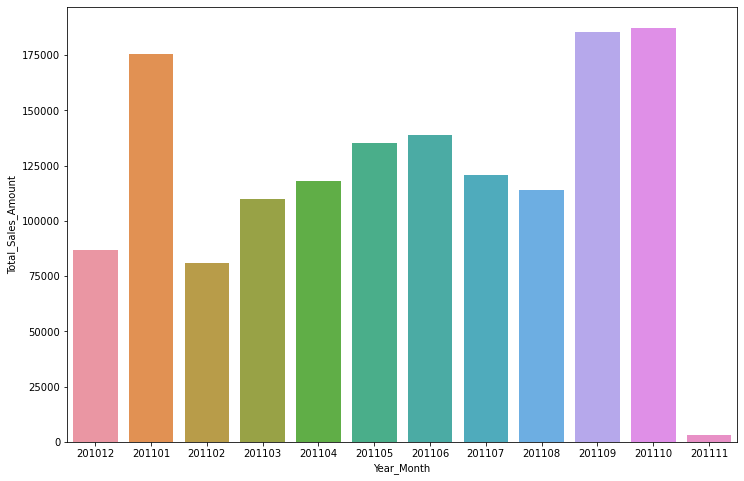

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_cluster_zero_revenue['Year_Month'],y=df_cluster_zero_revenue['Total_Sales_Amount'])
plt.show()

These customers have purchased throughout the year except in the month of November 2011 and we can also see sudden spike in purchase during the month of January,september and October.Based on the usual peak season information,this unusual purchase behavior could be due to stocking before the peak seasons and restocking after the peak season.

### Cluster 1:

In [ ]:
cluster_1.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12353,195.0,4.0,89.00,1
12361,278.0,10.0,189.90,1
12401,294.0,5.0,84.30,1
12441,357.0,11.0,173.55,1
12450,147.0,8.0,197.88,1


In [ ]:
cluster_1.reset_index(inplace=True)

In [ ]:
df_cluster_1 = df.merge(cluster_1, on='CustomerID')
df_cluster_1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,1,201012,2010,12,3,...,9.95,13747,United Kingdom,79.6,2010Q4,2010-12-01,364.0,1.0,79.6,1
1,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1,201012,2010,12,3,...,1.85,12791,Netherlands,177.6,2010Q4,2010-12-01,364.0,2.0,192.6,1


In [ ]:
df_cluster_1.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    463
France              8
Others              7
Spain               4
Germany             3
Name: CustomerID, dtype: int64

- Out of 492 customers in cluster 1, we have 463 customers from UK.

In [ ]:
df_cluster_1_revenue= df_cluster_1.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_1_revenue

,Year_Month,Total_Sales_Amount
0,201012,8881.37
1,201101,6707.56
2,201102,6506.13
3,201103,10220.32
4,201104,7580.89
5,201105,10415.38
6,201106,7619.90
7,201107,5065.29
8,201108,7278.15
9,201109,4685.45


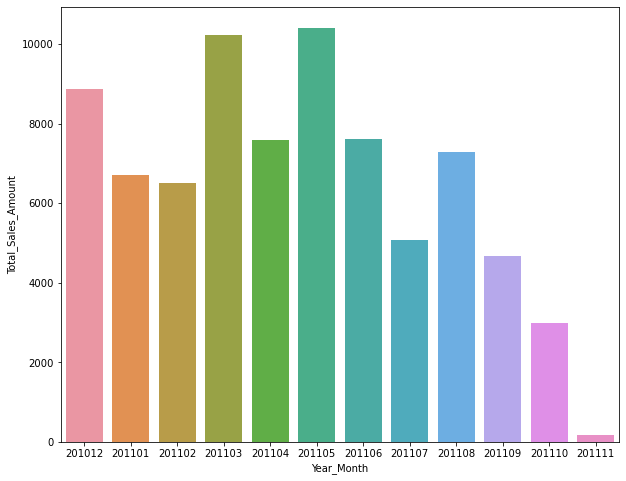

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_cluster_1_revenue['Year_Month'],y=df_cluster_1_revenue['Total_Sales_Amount'])
plt.show()

Based on the purchase behavior of customers in this cluster,we can observe a gradual decrease in spending over the months.Hence we should identify the factors leading to the drop in purchases before the customer churns.

### Cluster 2:

In [ ]:
cluster_2.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12350,301.0,17.0,334.40,2
12355,205.0,13.0,459.40,2
12358,141.0,12.0,484.86,2
12363,100.0,23.0,552.00,2
12365,282.0,22.0,641.38,2


In [ ]:
cluster_2.reset_index(inplace=True)

In [ ]:
df_cluster_2 = df.merge(cluster_2, on='CustomerID')
df_cluster_2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,1,201012,2010,12,3,...,10.95,15100,United Kingdom,350.4,2010Q4,2010-12-01,324.0,3.0,876.0,2
1,537767,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-08 12:09:00,8,201012,2010,12,3,...,10.95,15100,United Kingdom,350.4,2010Q4,2010-12-08,324.0,3.0,876.0,2


In [ ]:
df_cluster_2.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    723
Germany            15
Others             13
France             13
Portugal            6
Name: CustomerID, dtype: int64

- Out of the total 795 customers in cluster 2, there are 723 customers from the UK.

In [ ]:
df_cluster_2_revenue= df_cluster_2.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_2_revenue

,Year_Month,Total_Sales_Amount
0,201012,52040.60
1,201101,33695.95
2,201102,41885.85
3,201103,54256.74
4,201104,39764.87
5,201105,41332.12
6,201106,30676.61
7,201107,31071.09
8,201108,28071.94
9,201109,14494.64


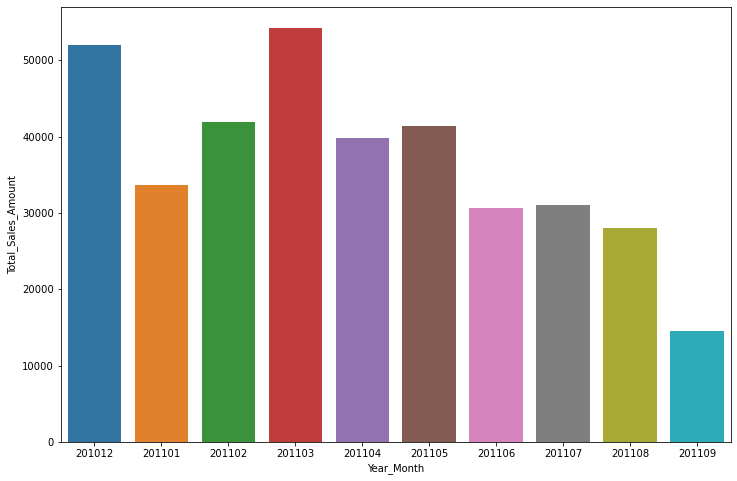

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_cluster_2_revenue['Year_Month'],y=df_cluster_2_revenue['Total_Sales_Amount'])
plt.show()

we can observe that the customers in this cluster have not purchased for the past two months and they are no longer in business with us.We should strategize a marketing plan to persuade these customers to buy again.

### Cluster 3:

In [ ]:
cluster_3.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12375,1.0,17.0,457.50,3
12384,19.0,27.0,585.27,3
12403,40.0,5.0,427.70,3
12420,54.0,29.0,600.39,3
12430,34.0,11.0,256.40,3


In [ ]:
cluster_3.reset_index(inplace=True)

In [ ]:
df_cluster_3 = df.merge(cluster_3, on='CustomerID')
df_cluster_3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-12-01 09:56:00,1,201012,2010,12,3,...,19.95,17420,United Kingdom,19.95,2010Q4,2010-12-01,41.0,30.0,598.83,3
1,536385,22961,JAM MAKING SET PRINTED,12,2010-12-01 09:56:00,1,201012,2010,12,3,...,1.45,17420,United Kingdom,17.40,2010Q4,2010-12-01,41.0,30.0,598.83,3


In [ ]:
df_cluster_3.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    761
Germany            18
France             13
Spain               5
Others              5
Name: CustomerID, dtype: int64

- Out of the total 815 customers, there are 761 customers from the UK

In [ ]:
df_cluster_3_revenue= df_cluster_3.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_3_revenue

,Year_Month,Total_Sales_Amount
0,201012,7522.000
1,201101,3138.300
2,201102,5654.380
3,201103,7843.070
4,201104,4737.870
5,201105,8341.780
6,201106,11590.130
7,201107,9193.130
8,201108,7552.550
9,201109,51592.462


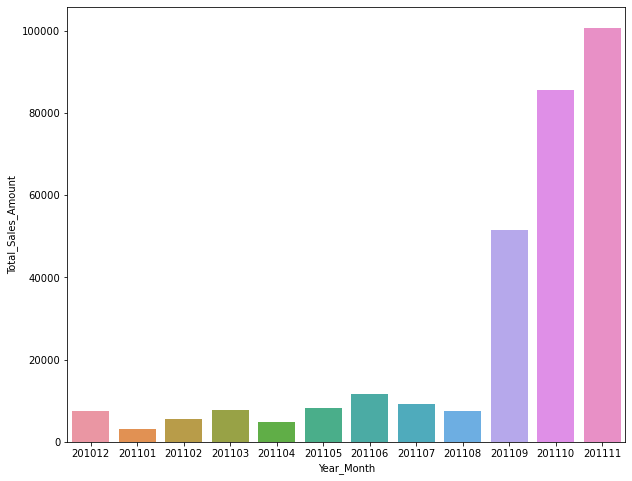

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_cluster_3_revenue['Year_Month'],y=df_cluster_3_revenue['Total_Sales_Amount'])
plt.show()

We can observe that there is a sudden spike in purchase by the customers in this cluster in the past three months.

### Cluster 4:

In [ ]:
cluster_4.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12347,30.0,171.0,4085.18,4
12357,24.0,131.0,6207.67,4
12359,48.0,245.0,6310.03,4
12362,26.0,236.0,4697.19,4
12370,42.0,166.0,3541.94,4


In [ ]:
cluster_4.reset_index(inplace=True)

In [ ]:
df_cluster_4 = df.merge(cluster_4, on='CustomerID')
df_cluster_4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1,201012,2010,12,3,...,1.69,13047,United Kingdom,54.08,2010Q4,2010-12-01,22.0,172.0,3237.54,4
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,1,201012,2010,12,3,...,2.10,13047,United Kingdom,12.60,2010Q4,2010-12-01,22.0,172.0,3237.54,4


In [ ]:
df_cluster_4.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    514
Germany            24
France             22
Belgium             7
Spain               6
Name: CustomerID, dtype: int64

- Out of the total 599 customers in cluster 4, there are 514 customers from the UK

In [ ]:
df_cluster_4_revenue= df_cluster_4.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_4_revenue

,Year_Month,Total_Sales_Amount
0,201012,366197.48
1,201101,309723.16
2,201102,276303.93
3,201103,373183.07
4,201104,262293.46
5,201105,424925.44
6,201106,422915.00
7,201107,383002.82
8,201108,433558.59
9,201109,586474.56


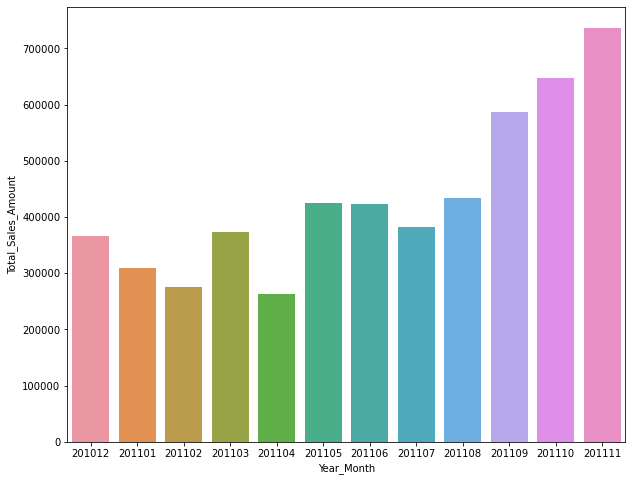

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_cluster_4_revenue['Year_Month'],y=df_cluster_4_revenue['Total_Sales_Amount'])
plt.show()

We can observe that these customers have purchased steadily throughout the year and has brought in the maximum revenue to the business.

### Cluster 5:

In [ ]:
cluster_5.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12349,9.0,73.0,1757.55,5
12352,27.0,85.0,2506.04,5
12356,13.0,59.0,2811.43,5
12374,16.0,33.0,742.93,5
12380,12.0,104.0,2724.81,5


In [ ]:
cluster_5.reset_index(inplace=True)

In [ ]:
df_cluster_5 = df.merge(cluster_5, on='CustomerID')
df_cluster_5.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day_of_Month,Year_Month,Year,Month,Day,...,UnitPrice,CustomerID,Country,Total_Sales_Amount,Quarter,Date,Recency,Frequency,Monetary,Labels
0,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-01 10:51:00,1,201012,2010,12,3,...,4.65,17924,United Kingdom,55.8,2010Q4,2010-12-01,2.0,31.0,2962.5,5
1,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,1,201012,2010,12,3,...,4.65,17924,United Kingdom,223.2,2010Q4,2010-12-01,2.0,31.0,2962.5,5


In [ ]:
df_cluster_5.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10)

Description
RABBIT NIGHT LIGHT                     6458
WORLD WAR 2 GLIDERS ASSTD DESIGNS      5376
ASSORTED COLOUR BIRD ORNAMENT          4709
PLACE SETTING WHITE HEART              3716
WHITE HANGING HEART T-LIGHT HOLDER     3421
JUMBO BAG RED RETROSPOT                3225
POPCORN HOLDER                         2988
PAPER CHAIN KIT 50'S CHRISTMAS         2935
WOODEN HEART CHRISTMAS SCANDINAVIAN    2705
GRAND CHOCOLATECANDLE                  2698
Name: Quantity, dtype: int64

In [ ]:
df_cluster_5.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).head(5)

Country
United Kingdom    674
France             16
Germany            12
Sweden              4
Spain               4
Name: CustomerID, dtype: int64

- Out of the total 737 customers in cluster 5, there are 674 customers from the UK

In [ ]:
df_cluster_5_revenue= df_cluster_5.groupby(['Year_Month'],as_index=False)['Total_Sales_Amount'].sum()
df_cluster_5_revenue

,Year_Month,Total_Sales_Amount
0,201012,48855.770
1,201101,39442.440
2,201102,34870.610
3,201103,38491.570
4,201104,35711.500
5,201105,56931.850
6,201106,48331.610
7,201107,49897.381
8,201108,53422.030
9,201109,108059.180


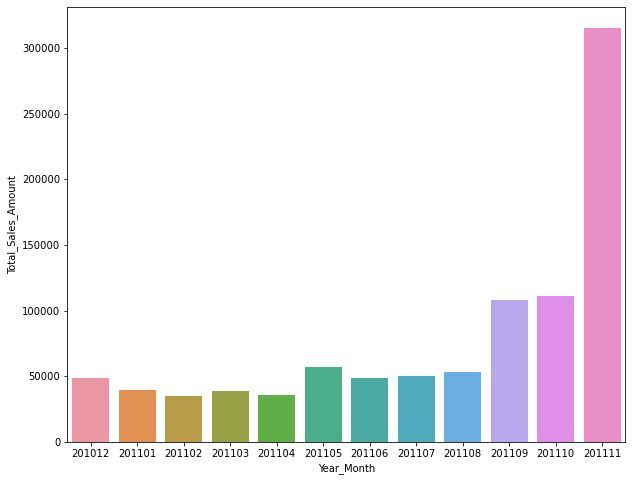

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_cluster_5_revenue['Year_Month'],y=df_cluster_5_revenue['Total_Sales_Amount'])
plt.show()

We can observe that these customers have purchased throughout the year,with an increase in spending for the past three months.They have the potential to become loyal customers.

1. **Cluster 0**: 
    - Total 860 customers.
    - They are the **Average-valued Customers** - Moderate Recency, Moderate Frequency and Moderate Monetary values.
    - These customers have the potential for becoming regular customers.
    - Efforts should be made to turn them into regular customers.
   
   
2. **Cluster 1**:
    - Total 492 customers.
    -  They are the **Customers At Risk** having High Recency,Low Frequncy and low Monetary values.
    - We should focus on these customers to make them Loyal to our business.
    
3. **Cluster 2**:
    - Total 795 customers.
    - They are the **Lost Customers** having High Recency,Low Frequency,Low Monetary value.
    - These customers have not purchased any products for the past two months.
    - These are the customer who ar eno longer in business with us hence we need to strategise marketing plan to make 
    - them buy again
     
       
    
4. **Cluster 3**:
    - Total 815 customers.
    - They are the **Recent Active Buyers** having Low Recency and Low Frequency with Low Monetary value
    - These are the customers who have started to buy recently and we need to focus on them to make them regular buyers.
    
    
5. **Cluster 4**: 
    - Total 599 customers.
    - They are the **High-valued Frequent Buyers** having Low Recency, High Frequency and High Monetary value.
    - We should try to retain these customers and make them loyal to our business.
   
   
6. **Cluster 5**:
    - Total 737 customers.
    - They are the **Regular Customers** having Low Recency,Moderate Frequency and Moderate Monetary value.
    - We should focus on these customers to make them purchase more as they are steady customers and are good for business.
    

### Customer Segmentation based on mean and median rfm values and revenue per year month

In [ ]:
rfm_segment['Segment']=rfm_segment['Labels'].map({0:'Average-valued Customers',1:'Customers At Risk',
                                                                2:'Lost Customers',3:'Recent Active Buyers',
                                                                4:'High-valued Frequent Buyers',5:'Regular Customers'})

## Business Insights

In [ ]:
rfm_segment.head()

,Recency,Frequency,Monetary,Labels,Segment
CustomerID,,,,,
12346,316.0,1.0,77183.60,0,Average-valued Customers
12347,30.0,171.0,4085.18,4,High-valued Frequent Buyers
12348,66.0,31.0,1797.24,0,Average-valued Customers
12349,9.0,73.0,1757.55,5,Regular Customers
12350,301.0,17.0,334.40,2,Lost Customers


In [ ]:
rfm_segment['Labels'].value_counts()

0    860
3    815
2    795
5    737
4    599
1    492
Name: Labels, dtype: int64

In [ ]:
rfm_segment['Segment'].value_counts()

Average-valued Customers       860
Recent Active Buyers           815
Lost Customers                 795
Regular Customers              737
High-valued Frequent Buyers    599
Customers At Risk              492
Name: Segment, dtype: int64

## Revenue Analysis for each Customer Segment

In [ ]:
data = pd.DataFrame(rfm_segment['Segment'].value_counts())
data.head(6)

,Segment
Average-valued Customers,860
Recent Active Buyers,815
Lost Customers,795
Regular Customers,737
High-valued Frequent Buyers,599
Customers At Risk,492


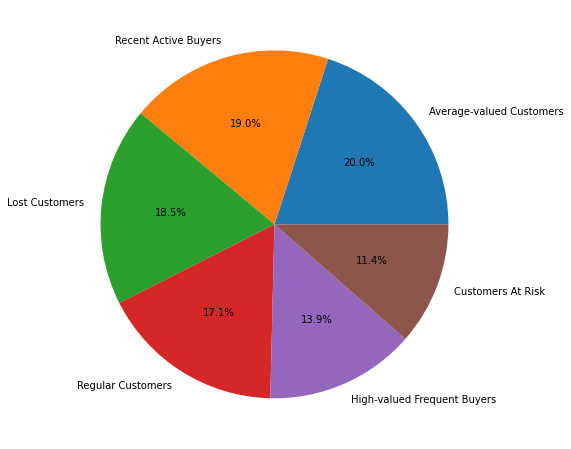

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(data['Segment'], labels=data.index,autopct="%1.1f%%")
plt.show()

## Mean values for every clusters with respect to RFM

In [ ]:
rfm_segment.head()

,Recency,Frequency,Monetary,Labels,Segment
CustomerID,,,,,
12346,316.0,1.0,77183.60,0,Average-valued Customers
12347,30.0,171.0,4085.18,4,High-valued Frequent Buyers
12348,66.0,31.0,1797.24,0,Average-valued Customers
12349,9.0,73.0,1757.55,5,Regular Customers
12350,301.0,17.0,334.40,2,Lost Customers


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


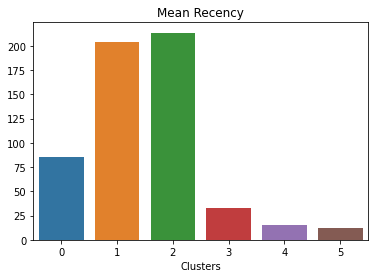

In [ ]:
recency_mean_plot=rfm_segment.groupby('Labels')['Recency'].mean()
plt.title('Mean Recency')
sns.barplot(recency_mean_plot.index,recency_mean_plot.values)
plt.xlabel('Clusters')
plt.show()

In [ ]:
##Median 

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


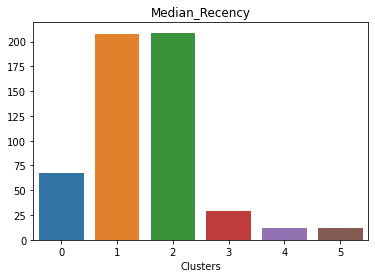

In [ ]:
recency_median_plot=rfm_segment.groupby('Labels')['Recency'].median()
plt.title('Median_Recency')
sns.barplot(recency_median_plot.index,recency_median_plot.values)
plt.xlabel('Clusters')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


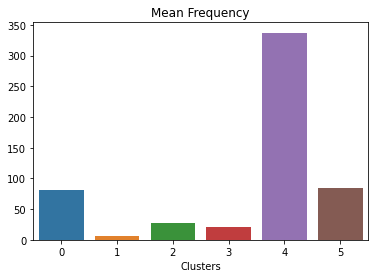

In [ ]:
frequency_mean_plot=rfm_segment.groupby('Labels')['Frequency'].mean()
frequency_mean_plot
plt.title('Mean Frequency')
sns.barplot(frequency_mean_plot.index,frequency_mean_plot.values)
plt.xlabel('Clusters')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


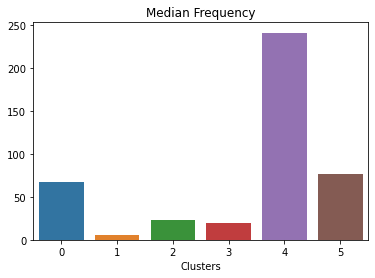

In [ ]:
frequency_median_plot=rfm_segment.groupby('Labels')['Frequency'].median()
frequency_median_plot
plt.title('Median Frequency')
sns.barplot(frequency_median_plot.index,frequency_median_plot.values)
plt.xlabel('Clusters')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


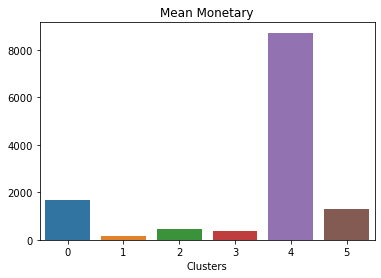

In [ ]:
monetary_mean_plot=rfm_segment.groupby('Labels')['Monetary'].mean()
plt.title('Mean Monetary')
sns.barplot(monetary_mean_plot.index,monetary_mean_plot.values)
plt.xlabel('Clusters')
plt.show()

C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


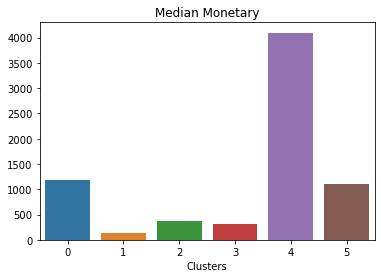

In [ ]:
monetary_median_plot=rfm_segment.groupby('Labels')['Monetary'].median()
plt.title('Median Monetary')
sns.barplot(monetary_median_plot.index,monetary_median_plot.values)
plt.xlabel('Clusters')
plt.show()

## Business recommendations

#### Average-valued customers

- Average-valued Customers spend on almost all months except in November when their purchases are low.
- These type of customers show sudden spike in purchasing behaviour or drop in purchases occasionally.
- They tend to stock up the products in advance for seasonal sales(January,september,october) so that they can make a good return of investment. 
- They are concerned about their budget.
- We can design a mix of **Emotion-driven and metric-driven marketing campaign** such that we should try to persuade them by messaging the upcoming offers, convince them of right choices by providing them with product descriptions and negotiable rates through emotional messages.
- Through this we can win over their loyalty for a longer time.

#### Customers at risk

- We need to identify these customers well in advance before they churn by monitoring their purcahse activity regularly.
- If their spending freuqncy is at an alarming rate, we need to send them personalized messages and provide them with customer support.
- We can design a **Personalized Customer Engagement Campaign** to deepen the realtionship with such customers and regularly monitor their purchase behaviour

#### Lost customers

- These are the customers we have lost over the years.
- According to a study by  Marketing Metrics, there is only a 20 to 40 percent chance of winning back an ex-customer.
- One of the best strategies to win back lost customers is by a offering a new deal.
- They did not make any purchases in the last two months.
- May be because of off-season and no discounts available
- So, in order to attract them we can introduce **End of Season Sale campaigns**.

#### Recent Active Buyers

- We can observe a drastic increase in purchases from these customers in the last three months of the year.
- These customers are making purchases during the holiday seasons when discounts are high.
- We need to focus on how to make them purchase more during off seasons.
- We can plan a **Replenishment Marketing Campaigns** for these customers.
    1. Remind the customer several days before the season begins.
    2. Provide all product details and offers up front.
    3. We can make them regular subscribers for the seasons.
    4. If needed, follow-up with an incentive.

#### High valued frequent buyers

- High-valued frequent buyers spend on almost all months and bring in maximum revenue to the business.
- we should try to retain these customers and make them loyal to our business.
- We can design a **Loyalty Marketing Campaign** such that we should try to provide them with maximum reward benefits and encourage them to continue buying from us.
- They are the most important segemnt of customers who contribute to the business growth. Therefore, we need to provide them with rewards and improve their lifetime value and also to strengthen their relationship with the business.

#### Regular Customers

- We can observe a gradual increase in purchases from these customers
- We need to focus on how to make them purchase more as they are steady customers and are good for business.
- We can analyze purchase behavior (most bought products) to identify valuable insights about what thecustomers are looking for, then deliver personalized recommendations right after they make their purchase in future.
- This is known as **Dynamic Product Recommendation** through cross-selling campaigns.